In [1]:
# Импорт библиотеки numpy:
import numpy as np

# Параметры функции:
a = 2
b = 1 
sigma = 0.02 # стандартное отклонение

# Количество точек:
N = 100
x_min = 0.01 # чтобы избежать log(0)
x_max = 10.0 # максимальное значение x

# Генерация случайных значений x:
x_n = np.random.uniform(x_min, x_max, N)

# Основная функция:
def f(x, a, b): 
    return 1 / (a * np.log(x + 1) + b)

# Добавление случайных ошибок:
xi_n = np.random.normal(0, sigma, N)
y_n = f(x_n, a, b) + xi_n

# Сохранение данных в файл:
data = np.column_stack((x_n, y_n))
np.savetxt("experimental_data.csv", data, delimiter=", ", header="{x_n, y_n}")

print(f"Данные сохранены в файл 'experimental_data.csv'")


Данные сохранены в файл 'experimental_data.csv'


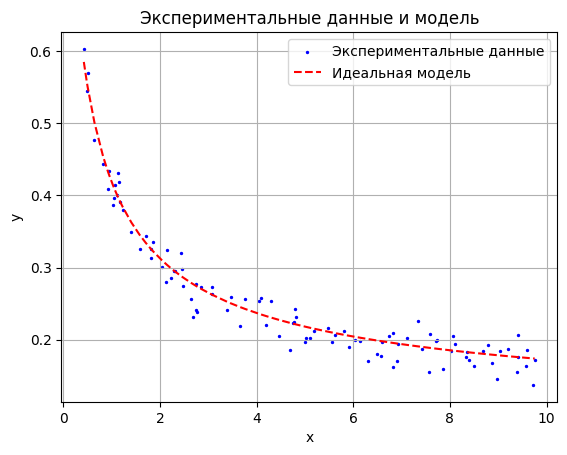

In [2]:
# Импорт библиотеки matplotlib:
import matplotlib.pyplot as plt

# Выгрузка и сортировка данных:
# Загрузка данных из файла:
data = np.loadtxt("experimental_data.csv", delimiter=", ")

# Отдельные массивы для x и y
x_n = data[:, 0]
y_n = data[:, 1]

x_sort = np.sort(x_n)
y_sort = f(x_sort, a, b)

# Визуализация исходных “экспериментальных” данных
plt.scatter(x_n, y_n, s=2,
 label="Экспериментальные данные", color="blue")
plt.plot(x_sort, y_sort,
 label="Идеальная модель", color="red", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Экспериментальные данные и модель")
plt.grid(True)
plt.show()


Оценки параметров:
a = 2.0822
b = 0.9670


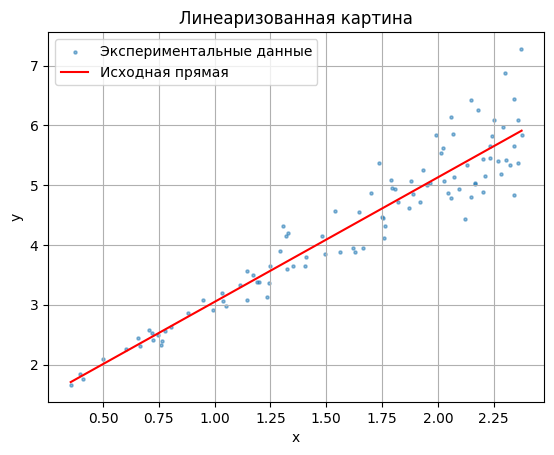

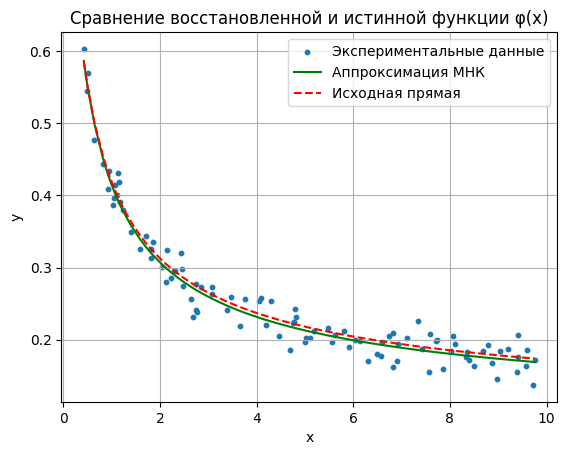

In [3]:
# Линеаризующее преобразование:
# Преобразование к Xn = ln(x + 1), Yn = 1 / y
X = np.log(x_n[y_n > 0] + 1)
Y = 1 / y_n[y_n > 0]

# Линейный метод наименьших квадратов (МНК):
# Формирование матрицы:
XS = np.sum(X)
XS2 = np.sum(X**2)
X_matrix = np.array([[len(X), XS], [XS, XS2]])

# Формирование вектора:
YS = np.sum(Y)
XYS = np.sum(Y * X)
XY_vector = (np.array([YS, XYS])).T

# Матричное уравнение:
parameters = np.dot(np.linalg.inv(X_matrix), XY_vector)

# Вычисление коэффициентов прямой Y = a * X + b:
a_est = parameters[1]
b_est = parameters[0]

# Оценки параметров:
print("Оценки параметров:")
print(f"a = {a_est:.4f}")
print(f"b = {b_est:.4f}")

# Проверка на линейность преобразования:
plt.scatter(X, Y, alpha=0.5, s=5, label="Экспериментальные данные")
plt.plot(np.sort(X), a_est * np.sort(X) + b_est,
         color="red", label="Исходная прямая")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Линеаризованная картина")
plt.legend()
plt.grid(True)
plt.show()

# Сравнение результатов при расчетных данных:
plt.scatter(x_n[y_n > 0], y_n[y_n > 0], s=10,
            label="Экспериментальные данные")
plt.plot(x_sort, f(x_sort, a_est, b_est),
         color="green", label="Аппроксимация МНК")
plt.plot(x_sort, f(x_sort, a, b),
         color="red", linestyle="--", label="Исходная прямая")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Сравнение восстановленной и истинной функции φ(x)")
plt.legend()
plt.grid(True)
plt.show()
